In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline


#html export
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
df = pd.read_csv(r'Nairobi Securities Exchange All Stocks Prices 2007-2012\NSE_data_all_stocks_2012.csv')
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,1/3/2012,^NASI,NSE All-Share Index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,0.51%,"10,990,000",-
1,1/3/2012,^N20I,NSE 20-Share Index,"3,312.56","4,985.91","3,212.86","3,212.86","3,212.86","3,205.02",7.84,0.24%,"10,990,000",-
2,1/3/2012,KPLC-P7,Kenya Power and Lighting 7%,5.5,5.5,5.5,5.5,5.5,5.5,-,-,0,-
3,1/3/2012,KPLC-P4,Kenya Power and Lighting 4%,7.65,7.65,7.65,7.65,7.65,7.65,-,-,0,-
4,1/3/2012,SCOM,Safaricom,3.05,6.5,2.9,3,2.95,2.95,-,-,"7,410,000",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,12/31/2012,REA,Rea Vipingo Plantations,14.5,23.5,19,19,19,19,-,-,"1,000",-
16040,12/31/2012,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-
16041,12/31/2012,KUKZ,Kakuzi,67.5,89,72,72,72,69,3,4.17%,"1,000",-
16042,12/31/2012,KAPC,Kapchorua Tea,111,148,118,118,118,118,-,-,100,-


### **Columns and Description**
- **DATE**: The date of the stock information.
- **CODE**: The stock or index code (e.g., ^NASI for NSE All-Share Index).
- **NAME**: The name of the stock or index.
- **12m Low**: The lowest price in the last 12 months.
- **12m High**: The highest price in the last 12 months.
- **Day Low**: The lowest price for the day.
- **Day High**: The highest price for the day.
- **Day Price**: The closing price for the day.
- **Previous**: The previous closing price.
- **Change**: The difference between the day's closing price and the previous closing price.
- **Change%**: The percentage change from the previous closing price.
- **Volume**: The number of shares traded during the day.
- **Adjust**: Adjustment data for the stock (e.g., for splits or dividends).- **

### **Preparing the dataset** ##

In [3]:
# make column names and values uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = df.dtypes[df.dtypes == 'object'].index
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head()

,date,code,name,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume,adjust
0,1/3/2012,^nasi,nse_all-share_index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,0.51%,"10,990,000",-
1,1/3/2012,^n20i,nse_20-share_index,"3,312.56","4,985.91","3,212.86","3,212.86","3,212.86","3,205.02",7.84,0.24%,"10,990,000",-
2,1/3/2012,kplc-p7,kenya_power_and_lighting_7%,5.5,5.5,5.5,5.5,5.5,5.5,-,-,0,-
3,1/3/2012,kplc-p4,kenya_power_and_lighting_4%,7.65,7.65,7.65,7.65,7.65,7.65,-,-,0,-
4,1/3/2012,scom,safaricom,3.05,6.5,2.9,3,2.95,2.95,-,-,"7,410,000",-


In [4]:
df.dtypes

date         object
code         object
name         object
12m_low      object
12m_high     object
day_low      object
day_high     object
day_price    object
previous     object
change       object
change%      object
volume       object
adjust       object
dtype: object

In [5]:
df.columns

Index(['date', 'code', 'name', '12m_low', '12m_high', 'day_low', 'day_high',
       'day_price', 'previous', 'change', 'change%', 'volume', 'adjust'],
      dtype='object')

In [6]:
numerical = ['12m_low', '12m_high', 'day_low', 'day_high', 'day_price', 'previous', 'change', 'volume', 'adjust']

In [7]:
# Converting specified columns

# Replace commas with empty strings in the selected columns
df[numerical] = df[numerical].replace({',': ''}, regex=True)

# Convert to numeric
df[numerical] = df[numerical].apply(pd.to_numeric, errors='coerce')

# Remove '%' symbol, handle invalid values, and convert to decimal
df['change%'] = pd.to_numeric(df['change%'].str.replace('%', '', regex=True), errors='coerce') / 100
numerical.append('change%')

# Convert the 'DATE' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')


In [8]:
df.dtypes

date         datetime64[ns]
code                 object
name                 object
12m_low             float64
12m_high            float64
day_low             float64
day_high            float64
day_price           float64
previous            float64
change              float64
change%             float64
volume                int64
adjust              float64
dtype: object

In [9]:
df

,date,code,name,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume,adjust
0,2012-01-03,^nasi,nse_all-share_index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,0.0051,10990000,NaN
1,2012-01-03,^n20i,nse_20-share_index,3312.56,4985.91,3212.86,3212.86,3212.86,3205.02,7.84,0.0024,10990000,NaN
2,2012-01-03,kplc-p7,kenya_power_and_lighting_7%,5.50,5.50,5.50,5.50,5.50,5.50,NaN,NaN,0,NaN
3,2012-01-03,kplc-p4,kenya_power_and_lighting_4%,7.65,7.65,7.65,7.65,7.65,7.65,NaN,NaN,0,NaN
4,2012-01-03,scom,safaricom,3.05,6.50,2.90,3.00,2.95,2.95,NaN,NaN,7410000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,2012-12-31,rea,rea_vipingo_plantations,14.50,23.50,19.00,19.00,19.00,19.00,NaN,NaN,1000,NaN
16040,2012-12-31,limt,limuru_tea,400.00,500.00,430.00,430.00,430.00,430.00,NaN,NaN,0,NaN
16041,2012-12-31,kukz,kakuzi,67.50,89.00,72.00,72.00,72.00,69.00,3.00,0.0417,1000,NaN
16042,2012-12-31,kapc,kapchorua_tea,111.00,148.00,118.00,118.00,118.00,118.00,NaN,NaN,100,NaN


### **Data Cleaning**

In [10]:
df.isna().sum()

date             0
code             0
name             0
12m_low          0
12m_high         0
day_low          0
day_high         0
day_price        0
previous         3
change        7137
change%       7140
volume           0
adjust       15333
dtype: int64

In [11]:
# Drop rows where 'Previous' column is null
df = df.dropna(subset=['previous'])

In [12]:
df[df['change'].isna()]

,date,code,name,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume,adjust
2,2012-01-03,kplc-p7,kenya_power_and_lighting_7%,5.50,5.50,5.50,5.50,5.50,5.50,NaN,NaN,0,NaN
3,2012-01-03,kplc-p4,kenya_power_and_lighting_4%,7.65,7.65,7.65,7.65,7.65,7.65,NaN,NaN,0,NaN
4,2012-01-03,scom,safaricom,3.05,6.50,2.90,3.00,2.95,2.95,NaN,NaN,7410000,NaN
5,2012-01-03,accs,accesskenya_group,3.90,8.45,5.05,5.35,5.15,5.15,NaN,NaN,14300,NaN
7,2012-01-03,orch,kenya_orchards,3.00,3.00,3.00,3.00,3.00,3.00,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16038,2012-12-31,sasn,sasini_tea_and_coffee,10.50,13.60,11.70,12.00,11.70,11.70,NaN,NaN,32200,NaN
16039,2012-12-31,rea,rea_vipingo_plantations,14.50,23.50,19.00,19.00,19.00,19.00,NaN,NaN,1000,NaN
16040,2012-12-31,limt,limuru_tea,400.00,500.00,430.00,430.00,430.00,430.00,NaN,NaN,0,NaN
16042,2012-12-31,kapc,kapchorua_tea,111.00,148.00,118.00,118.00,118.00,118.00,NaN,NaN,100,NaN


In [13]:
# replacing nulls with zero to indicate no change
df['change'] = df['change'].fillna(0)
df['change%'] = df['change%'].fillna(0)

C:\Users\Deninjo\AppData\Local\Temp\ipykernel_1144\3976370364.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Deninjo\AppData\Local\Temp\ipykernel_1144\3976370364.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop(columns='adjust')

In [16]:
df.isna().sum()

date         0
code         0
name         0
12m_low      0
12m_high     0
day_low      0
day_high     0
day_price    0
previous     0
change       0
change%      0
volume       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16041 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       16041 non-null  datetime64[ns]
 1   code       16041 non-null  object        
 2   name       16041 non-null  object        
 3   12m_low    16041 non-null  float64       
 4   12m_high   16041 non-null  float64       
 5   day_low    16041 non-null  float64       
 6   day_high   16041 non-null  float64       
 7   day_price  16041 non-null  float64       
 8   previous   16041 non-null  float64       
 9   change     16041 non-null  float64       
 10  change%    16041 non-null  float64       
 11  volume     16041 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.6+ MB


In [18]:
df

,date,code,name,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume
0,2012-01-03,^nasi,nse_all-share_index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,0.0051,10990000
1,2012-01-03,^n20i,nse_20-share_index,3312.56,4985.91,3212.86,3212.86,3212.86,3205.02,7.84,0.0024,10990000
2,2012-01-03,kplc-p7,kenya_power_and_lighting_7%,5.50,5.50,5.50,5.50,5.50,5.50,0.00,0.0000,0
3,2012-01-03,kplc-p4,kenya_power_and_lighting_4%,7.65,7.65,7.65,7.65,7.65,7.65,0.00,0.0000,0
4,2012-01-03,scom,safaricom,3.05,6.50,2.90,3.00,2.95,2.95,0.00,0.0000,7410000
...,...,...,...,...,...,...,...,...,...,...,...,...
16039,2012-12-31,rea,rea_vipingo_plantations,14.50,23.50,19.00,19.00,19.00,19.00,0.00,0.0000,1000
16040,2012-12-31,limt,limuru_tea,400.00,500.00,430.00,430.00,430.00,430.00,0.00,0.0000,0
16041,2012-12-31,kukz,kakuzi,67.50,89.00,72.00,72.00,72.00,69.00,3.00,0.0417,1000
16042,2012-12-31,kapc,kapchorua_tea,111.00,148.00,118.00,118.00,118.00,118.00,0.00,0.0000,100


In [19]:
og_df = df.copy()

### **EDA**

<Axes: xlabel='day_price', ylabel='Count'>

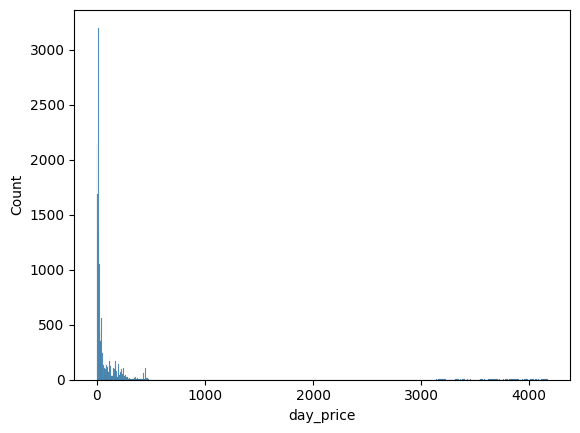

In [54]:
# Look at the final_price variable. Does it have a long tail?
sns.histplot(df['day_price'])

∴ The prices have a long tail distribution as most prices are cheap and few expensive ones <br>
This type of distribution is not good for ML as the tail will confuse our model <br>
Hence we get rid of the tail by applying logarithmic distribution to the price

In [21]:
price_logs = np.log1p(df['day_price'])

<Axes: xlabel='day_price', ylabel='Count'>

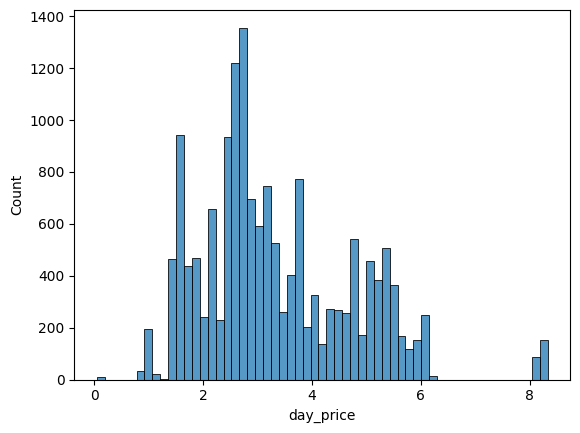

In [22]:
sns.histplot(price_logs)

### **Prepare and split the dataset**
- Splitting the data in train/val/test sets, with 60%/20%/20% distribution.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# splitting the data into 80% training, 20% testing
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [25]:
len(df_full_train), len(df_test)

(12832, 3209)

In [26]:
# splitting full train to train and validation
# validation == 20% of data(25% of full train[20/80])
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
len(df_train), len(df_val), len(df_test)

(9624, 3208, 3209)

In [28]:
# resetting the index with new shuffled dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train

,date,code,name,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume
0,2012-05-11,baum,a.baumann,11.10,11.10,11.10,11.10,11.10,11.10,0.00,0.0000,0
1,2012-01-20,knre,kenya_re-insurance_corporation,7.20,16.45,7.70,8.00,7.90,7.70,0.20,0.0253,88900
2,2012-03-30,bbk,barclays_bank,11.75,18.50,11.80,12.45,12.05,12.45,-0.40,0.0332,395800
3,2012-02-16,mash,marshalls_(e.a.),12.00,14.20,12.45,12.45,12.45,12.45,0.00,0.0000,0
4,2012-08-30,kegn,kengen,7.40,16.05,8.30,8.40,8.30,8.35,-0.05,0.0060,413000
...,...,...,...,...,...,...,...,...,...,...,...,...
9619,2012-04-17,scbk,standard_chartered_bank,160.00,320.00,161.00,173.00,169.00,172.00,-3.00,0.0178,2200
9620,2012-06-18,rea,rea_vipingo_plantations,14.50,23.50,16.10,16.10,16.10,16.00,0.10,0.0062,2000
9621,2012-12-13,sgl,standard_group,19.09,27.00,20.50,23.00,22.25,21.00,1.25,0.0562,800
9622,2012-07-16,hfck,housing_finance,13.00,26.50,15.00,15.35,15.20,15.30,-0.10,0.0066,78700


In [29]:
y_train = df_train.day_price.values
y_val = df_val.day_price.values
y_test = df_test.day_price.values

y_train

array([11.1 ,  7.9 , 12.05, ..., 22.25, 15.2 , 13.5 ])

In [30]:
y_train = np.log1p(df_train['day_price'].values)
y_val = np.log1p(df_val['day_price'].values)
y_test = np.log1p(df_test['day_price'].values)

In [31]:
# delete churn variable to avoid accidentally using it
del df_train['day_price']
del df_val['day_price']
del df_test['day_price']

### **Manual Linear Regression**

The linear model:

$$
g(X_i) = W_0 + W_1 X_{i1} + W_2 X_{i2} + W_3 X_{i3} = y
$$

$$
g(X) =  (X)^T \cdot W = y
$$

Substituting W we get:
$$
 W \approx y \cdot X^T \cdot (X^T \cdot X)^{-1}
$$

In [32]:
# function for getting weights
def train_linear_regression(X, y, r=10):
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + (r * np.eye(XTX.shape[0]))

    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [33]:
numerical = ['12m_low',
 '12m_high',
 'day_low',
 'day_high',
 'previous',
 'volume',
 ]

categorical = ['code']

In [34]:
df['code'].value_counts()

code
berg      251
kapc      251
arm       251
xprs      251
uchm      251
         ... 
cfc-r      17
dtk-r      10
kq-r        9
nic-r       9
scbk-r      7
Name: count, Length: 69, dtype: int64

In [35]:
# creating a dictionary to store the categorical variables 
# with their most popular values
categories = {}

for c in categorical:
    categories[c] = list(df[c].value_counts().head().index)

In [36]:
def prepare_x(df):
    df = df.copy() # so as to not modify the original df
    features = numerical.copy()


    # adding catgorical variables to our feature matrix by:
    # looping through each key and value in category dict then
    # converting to binary column for each value
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))


    df_num = df[features]
    X = df_num.values


    return X

In [37]:
prepare_x(df_train)

array([[11.1 , 11.1 , 11.1 , ...,  0.  ,  0.  ,  0.  ],
       [ 7.2 , 16.45,  7.7 , ...,  0.  ,  0.  ,  0.  ],
       [11.75, 18.5 , 11.8 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [19.09, 27.  , 20.5 , ...,  0.  ,  0.  ,  0.  ],
       [13.  , 26.5 , 15.  , ...,  0.  ,  0.  ,  0.  ],
       [11.75, 18.5 , 13.45, ...,  0.  ,  0.  ,  0.  ]])

In [38]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [39]:
# training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train, r=10)

# validation
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 4)
print("RMSE: ", score)

RMSE:  0.9876


<Axes: ylabel='Count'>

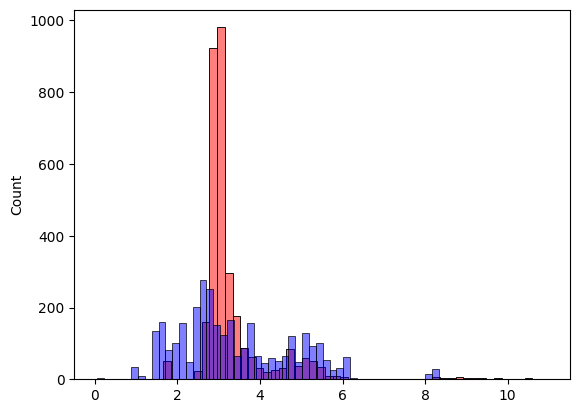

In [40]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)   # predictions
sns.histplot(y_val, color='blue', alpha=0.5, bins=50) # target variables

In [41]:
# taking a sample price from our dataset and trying to predict its price
price = df_test.iloc[45].to_dict()
price

{'date': Timestamp('2012-08-09 00:00:00'),
 'code': 'sgl',
 'name': 'standard_group',
 '12m_low': 20.0,
 '12m_high': 39.0,
 'day_low': 22.5,
 'day_high': 23.0,
 'previous': 25.0,
 'change': -2.25,
 'change%': 0.0989,
 'volume': 5700}

In [42]:
price_df = pd.DataFrame([price])
price_df

,date,code,name,12m_low,12m_high,day_low,day_high,previous,change,change%,volume
0,2012-08-09,sgl,standard_group,20.0,39.0,22.5,23.0,25.0,-2.25,0.0989,5700


In [43]:
# feature matrix for our car
X_car = prepare_x(price_df)

In [44]:
# our prediction
price = w0 + X_car.dot(w)
price = price[0]
price = np.expm1(price)
price

20.990216505985902

In [45]:
# the actual price
np.expm1(y_test[45])

22.750000000000004

### **Linear Regression with Scikit Learn**

Import dataset

In [46]:
df = og_df.copy()
df


,date,code,name,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume
0,2012-01-03,^nasi,nse_all-share_index,73.23,119.37,68.38,68.38,68.38,68.03,0.35,0.0051,10990000
1,2012-01-03,^n20i,nse_20-share_index,3312.56,4985.91,3212.86,3212.86,3212.86,3205.02,7.84,0.0024,10990000
2,2012-01-03,kplc-p7,kenya_power_and_lighting_7%,5.50,5.50,5.50,5.50,5.50,5.50,0.00,0.0000,0
3,2012-01-03,kplc-p4,kenya_power_and_lighting_4%,7.65,7.65,7.65,7.65,7.65,7.65,0.00,0.0000,0
4,2012-01-03,scom,safaricom,3.05,6.50,2.90,3.00,2.95,2.95,0.00,0.0000,7410000
...,...,...,...,...,...,...,...,...,...,...,...,...
16039,2012-12-31,rea,rea_vipingo_plantations,14.50,23.50,19.00,19.00,19.00,19.00,0.00,0.0000,1000
16040,2012-12-31,limt,limuru_tea,400.00,500.00,430.00,430.00,430.00,430.00,0.00,0.0000,0
16041,2012-12-31,kukz,kakuzi,67.50,89.00,72.00,72.00,72.00,69.00,3.00,0.0417,1000
16042,2012-12-31,kapc,kapchorua_tea,111.00,148.00,118.00,118.00,118.00,118.00,0.00,0.0000,100


Define X and Y


In [47]:
x = df[numerical].values
y = df['day_price'].values


Split the dataset into training and test set

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Train model on training set

In [50]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

Predict test set results

In [51]:
y_pred = ml.predict(X_test)
y_pred

array([176.91973578,  21.92244433,   3.73006219, ...,  10.58664684,
       122.92343192, 230.45909498])

Evaluate our model

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"r2 : {r2}")
print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")

r2 : 0.9999981109318441
mae : 0.21841340370866938
mse : 0.33281365485745246
rmse : 0.5769000388780126


Predicted values

In [53]:
pred_y_df = pd.DataFrame({'Actual value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_y_df.head(25)

,Actual value,Predicted Value,Difference
0,177.00,176.919736,0.080264
1,22.00,21.922444,0.077556
2,3.80,3.730062,0.069938
3,13.35,13.897606,-0.547606
4,23.00,23.056875,-0.056875
5,19.95,19.773874,0.176126
6,257.00,257.589877,-0.589877
7,16.95,16.817810,0.132190
8,12.50,12.428493,0.071507
9,75.49,75.541084,-0.051084
